In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
def func_for_object(data, name):
    data[name] = data[name].astype(str).apply(
        lambda x: None if x.strip() == '' else x)
    print('as is', data[name].value_counts(), sep='\n')
    if data[name].value_counts()[0]/data.shape[0] > 0.5:
        data[name] = data[name].astype(str).apply(
            lambda x: data[name].value_counts().index[0] if x.strip() == 'nan' else x)
        print('to be', data[name].value_counts(), sep='\n')
        return
    else:
        print('Необходима экспертная оценка')

In [3]:
df = pd.read_csv('stud_math.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
df = df[~df['score'].isna()]

In [6]:
df.shape

(389, 30)

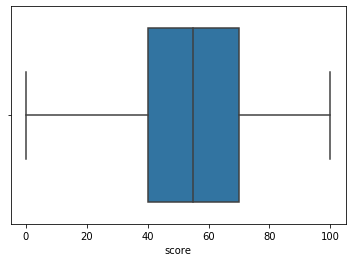

In [7]:
sns.boxplot(df['score'])

Студентов, которые получили меньше 40 баллов, будем считать провалившими экзамен

# School

In [8]:
df.school.value_counts()

GP    344
MS     45
Name: school, dtype: int64

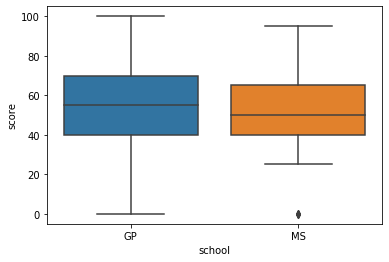

In [9]:
sns.boxplot(x = 'school', y = 'score', data = df)

Больших различий в результатах экзамена нет, не будем использовать

# Sex

In [10]:
df.sex.value_counts()

F    204
M    185
Name: sex, dtype: int64

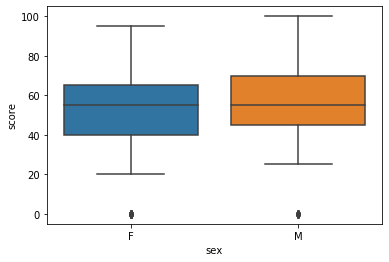

In [11]:
sns.boxplot(x = 'sex', y = 'score', data = df)

Можем заметить, что девочки сдают экзамен незначительно лучше, не будем использовать

# Age

In [12]:
df.age.value_counts()

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

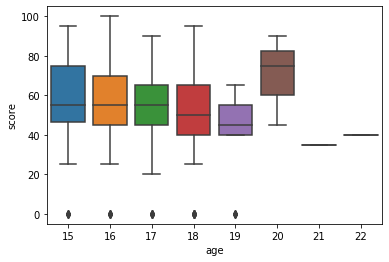

In [13]:
sns.boxplot(x = 'age', y = 'score', data = df)

Возраст не оказывает большого влияния на оценку, не будем использовать

# Adderss

In [14]:
df_test = df[['address','score']].fillna('None')

In [15]:
df_test['address'].value_counts()

U       291
R        83
None     15
Name: address, dtype: int64

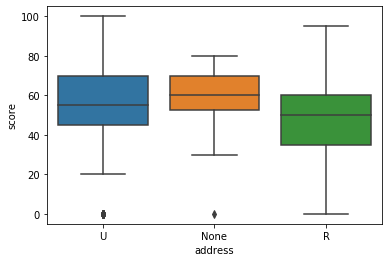

In [16]:
sns.boxplot(x = 'address', y = 'score', data = df_test)

Большая часть учеников живет в городах. По распределению оценок у учеников с пропусками, можем предположить, что они живут в городах

In [17]:
func_for_object(df, 'address')

as is
U      291
R       83
nan     15
Name: address, dtype: int64
to be
U    306
R     83
Name: address, dtype: int64


# Famsize

In [18]:
df_test = df[['famsize','score']].fillna('None')

In [19]:
df_test.famsize.value_counts()

GT3     255
LE3     107
None     27
Name: famsize, dtype: int64

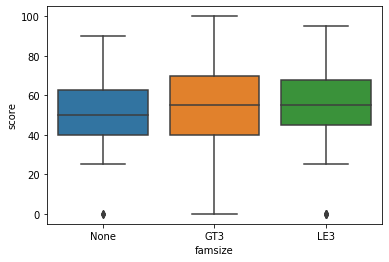

In [20]:
sns.boxplot(x = 'famsize', y = 'score', data = df_test)

Размер семьи не влияет на итоговую оценку, не будем использовать

# Pstatus

In [21]:
df_test = df[['Pstatus','score']].fillna('None')

In [22]:
df_test.Pstatus.value_counts()

T       308
None     45
A        36
Name: Pstatus, dtype: int64

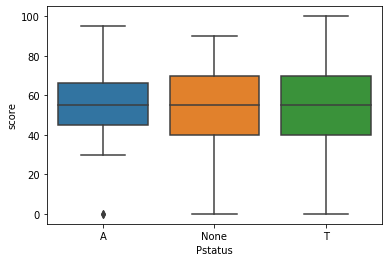

In [23]:
sns.boxplot(x = 'Pstatus', y = 'score', data = df_test)

Больших различий нет, использовать не будем

# Medu

In [24]:
df_test = df[['Medu','score']].fillna('None')

In [25]:
df_test.Medu.value_counts()

4.0     131
2.0     100
3.0      96
1.0      56
None      3
0.0       3
Name: Medu, dtype: int64

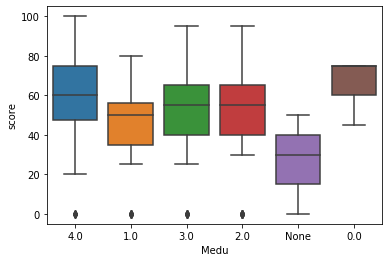

In [26]:
sns.boxplot(x = 'Medu', y = 'score', data = df_test)

Уровень образования матери влияет на результат экзамена. Пропуски удалим

In [27]:
df = df[~df['Medu'].isna()]

# Fedu

In [28]:
df_test = df[['Fedu','score']].fillna('None')

In [29]:
df_test.Fedu.value_counts()

2.0     104
3.0      93
4.0      88
1.0      74
None     24
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [30]:
# 40 - это выброс, так как возможные варианты [0, 4], удалим
df = df.loc[df.Fedu != 40]
df.shape

(385, 30)

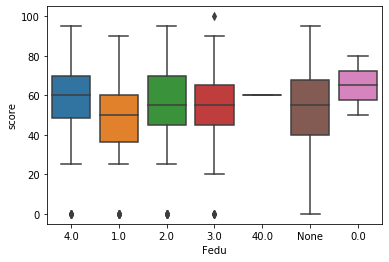

In [31]:
sns.boxplot(x = 'Fedu', y = 'score', data = df_test)

Уровень образования отца влияет на результат экзамена. Пропуски заменим на 1

In [32]:
df['Fedu'] = df['Fedu'].fillna(1)

# Mjob

In [33]:
df_test = df[['Mjob','score']].fillna('None')

In [34]:
df_test.Mjob.value_counts()

other       125
services     96
at_home      58
teacher      55
health       32
None         19
Name: Mjob, dtype: int64

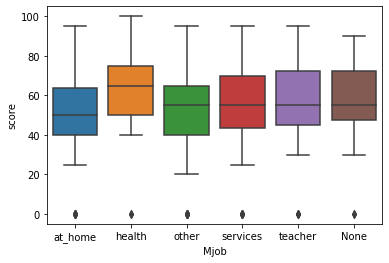

In [35]:
sns.boxplot(x = 'Mjob', y = 'score', data = df_test)

Если мать работает в здравоохранении, то результаты экзамена лучше. По остальным отраслям больших отличий нет. Введем новый параметр: мать работает в здравоохранении (0 - нет, 1 - да)

In [36]:
df.loc[df['Mjob']=='health', 'Mjob_health'] = 1
df.loc[df['Mjob']!='health', 'Mjob_health'] = 0

# Fjob

In [37]:
df_test = df[['Fjob','score']].fillna('None')

In [38]:
df_test.Fjob.value_counts()

other       192
services     97
None         36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

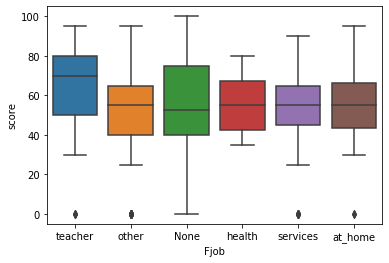

In [39]:
sns.boxplot(x = 'Fjob', y = 'score', data = df_test)

Если отец работает в образовании, то результаты экзамена лучше. По остальным отраслям больших отличий нет. Введем новый параметр: отец работает в образовании (0 - нет, 1 - да)

In [40]:
df.loc[df['Mjob']=='teacher', 'Fjob_teacher'] = 1
df.loc[df['Mjob']!='teacher', 'Fjob_teacher'] = 0

# Reason

In [41]:
df_test = df[['reason','score']].fillna('None')

In [42]:
df_test.reason.value_counts()

course        135
home          100
reputation     99
other          34
None           17
Name: reason, dtype: int64

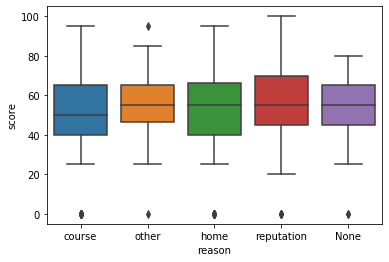

In [43]:
sns.boxplot(x = 'reason', y = 'score', data = df_test)

Причина выбора школы не влияет на значение итоговой оценки, не будем использовать

# Guardian

In [44]:
df_test = df[['guardian','score']].fillna('None')

In [45]:
df_test.guardian.value_counts()

mother    247
father     83
None       31
other      24
Name: guardian, dtype: int64

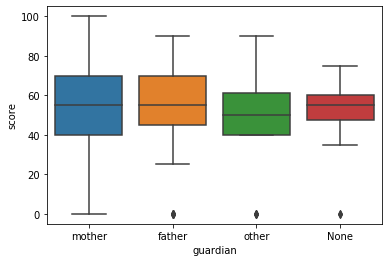

In [46]:
sns.boxplot(x = 'guardian', y = 'score', data = df_test)

In [47]:
func_for_object(df, 'guardian')

as is
mother    247
father     83
nan        31
other      24
Name: guardian, dtype: int64
to be
mother    278
father     83
other      24
Name: guardian, dtype: int64


# Traveltime

In [48]:
df_test = df[['traveltime','score']].fillna('None')

In [49]:
df_test.traveltime.value_counts()

1.0     236
2.0      94
None     28
3.0      20
4.0       7
Name: traveltime, dtype: int64

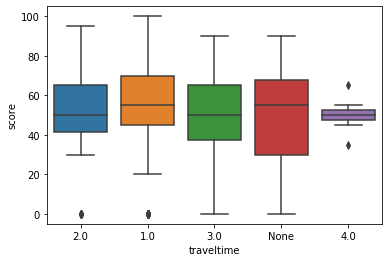

In [50]:
sns.boxplot(x = 'traveltime', y = 'score', data = df_test)

Больших различий нет, не будем использовать

# Studytime

In [51]:
df_test = df[['studytime','score']].fillna('None')

In [52]:
df_test.studytime.value_counts()

2.0     187
1.0     102
3.0      62
4.0      27
None      7
Name: studytime, dtype: int64

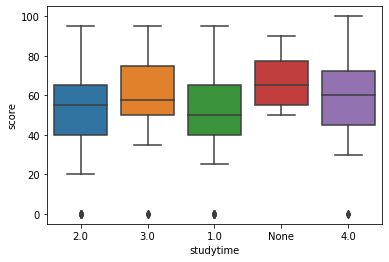

In [53]:
sns.boxplot(x = 'studytime', y = 'score', data = df_test)

Пропуски удалим

In [54]:
df = df[~df['studytime'].isna()]

# Failures

In [55]:
df_test = df[['failures','score']].fillna('None')

In [56]:
df_test.failures.value_counts()

0.0     283
1.0      46
None     21
3.0      14
2.0      14
Name: failures, dtype: int64

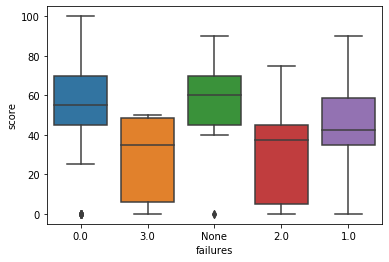

In [57]:
sns.boxplot(x = 'failures', y = 'score', data = df_test)

Студенты, имеющие много внеучебных неудач хуже сдают экзамен. Пропуски заменим на 0

In [58]:
df['failures'] = df['failures'].fillna(0)

# Schoolsup

In [59]:
df_test = df[['schoolsup','score']].fillna('None')

In [60]:
df_test.schoolsup.value_counts()

no      323
yes      46
None      9
Name: schoolsup, dtype: int64

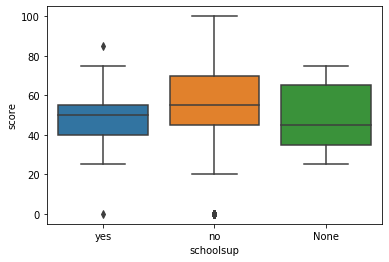

In [61]:
sns.boxplot(x = 'schoolsup', y = 'score', data = df_test)

Студенты с дополнительной образовательной поддержкой лучше сдают экзамен. Пропуски неоднозначны, удалим

In [62]:
df = df[~df['schoolsup'].isna()]

# Famsup

In [63]:
df_test = df[['famsup','score']].fillna('None')

In [64]:
df_test.famsup.value_counts()

yes     207
no      125
None     37
Name: famsup, dtype: int64

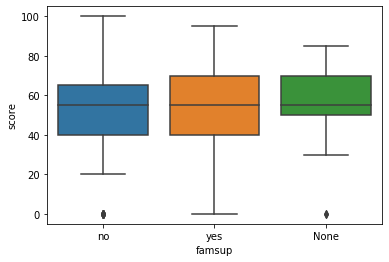

In [65]:
sns.boxplot(x = 'famsup', y = 'score', data = df_test)

Нет различий, использовать не будем

# Paid

In [66]:
df_test = df[['paid','score']].fillna('None')

In [67]:
df_test.paid.value_counts()

no      184
yes     146
None     39
Name: paid, dtype: int64

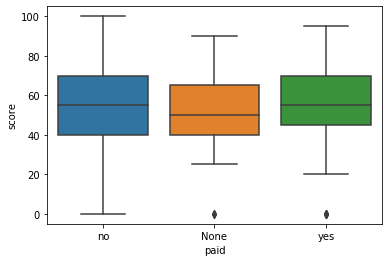

In [68]:
sns.boxplot(x = 'paid', y = 'score', data = df_test)

Нет различий, использовать не будем

# Activities

In [69]:
df_test = df[['activities','score']].fillna('None')

In [70]:
df_test.activities.value_counts()

yes     183
no      172
None     14
Name: activities, dtype: int64

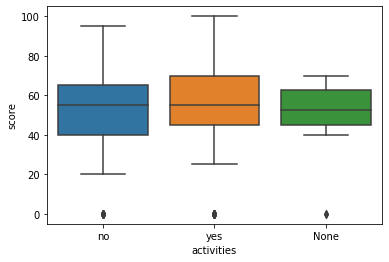

In [71]:
sns.boxplot(x = 'activities', y = 'score', data = df_test)

Не влияет на итоговую оценку, не будем использовать

# Nursery

In [72]:
df_test = df[['nursery','score']].fillna('None')

In [73]:
df_test.nursery.value_counts()

yes     280
no       74
None     15
Name: nursery, dtype: int64

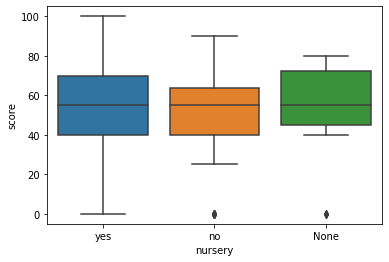

In [74]:
sns.boxplot(x = 'nursery', y = 'score', data = df_test)

Не различий, использовать не будем

# Higher

In [75]:
df_test = df[['higher','score']].fillna('None')

In [76]:
df_test.higher.value_counts()

yes     333
None     18
no       18
Name: higher, dtype: int64

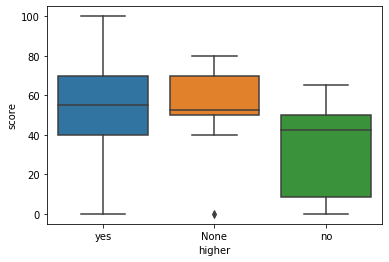

In [77]:
sns.boxplot(x = 'higher', y = 'score', data = df_test)

Студенты, которые не хотят высшего образования, проваливают экзамен. Значения оценки по экзамену при пропуске похожи на студентов, которые хотят высшее образование, заполним пропуски

In [78]:
func_for_object(df, 'higher')

as is
yes    333
nan     18
no      18
Name: higher, dtype: int64
to be
yes    351
no      18
Name: higher, dtype: int64


# Internet

In [79]:
df_test = df[['internet','score']].fillna('None')

In [80]:
df_test.internet.value_counts()

yes     287
no       49
None     33
Name: internet, dtype: int64

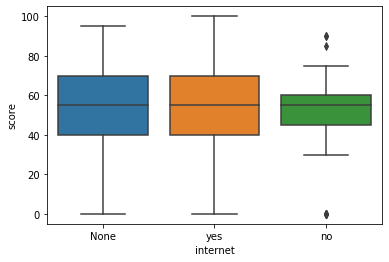

In [81]:
sns.boxplot(x = 'internet', y = 'score', data = df_test)

Нет различий, использовать не будем

# Romantic

In [82]:
df_test = df[['romantic','score']].fillna('None')

In [83]:
df_test.romantic.value_counts()

no      224
yes     118
None     27
Name: romantic, dtype: int64

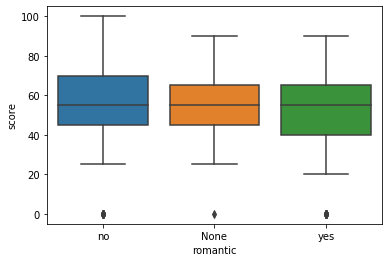

In [84]:
sns.boxplot(x = 'romantic', y = 'score', data = df_test)

Значения почти одиновые, не будем использовать

# Famrel

In [85]:
df_test = df[['famrel','score']].fillna('None')

In [86]:
df_test.famrel.value_counts()

4.0     172
5.0      90
3.0      57
None     27
2.0      15
1.0       7
-1.0      1
Name: famrel, dtype: int64

In [87]:
# -1 - выброс, уберем
df = df.loc[df.famrel != -1]

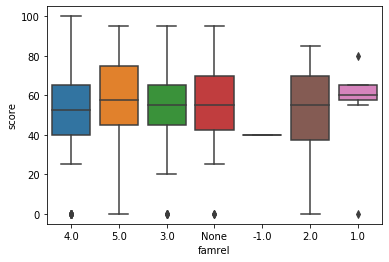

In [88]:
sns.boxplot(x = 'famrel', y = 'score', data = df_test)

Значения почти одиновые, не будем использовать

# Freetime

In [89]:
df_test = df[['freetime','score']].fillna('None')

In [90]:
df_test.freetime.value_counts()

3.0     146
4.0     107
2.0      58
5.0      32
1.0      17
None      8
Name: freetime, dtype: int64

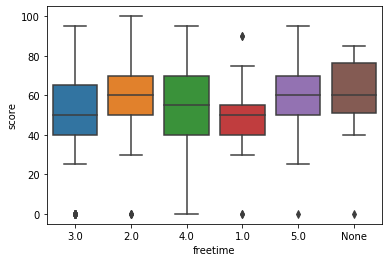

In [91]:
sns.boxplot(x = 'freetime', y = 'score', data = df_test)

Пропуски заменим на 4

In [92]:
df['freetime'] = df['freetime'].fillna(4)

# Goout

In [93]:
df_test = df[['goout','score']].fillna('None')

In [94]:
df_test.goout.value_counts()

3.0     121
2.0      94
4.0      77
5.0      48
1.0      22
None      6
Name: goout, dtype: int64

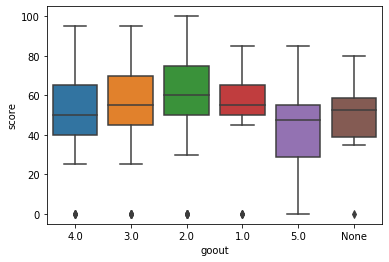

In [95]:
sns.boxplot(x = 'goout', y = 'score', data = df_test)

Пропуски заменим на 5

In [96]:
df['goout'] = df['goout'].fillna('5')

# Health

In [97]:
df_test = df[['health','score']].fillna('None')

In [98]:
df_test.health.value_counts()

5.0     131
3.0      82
4.0      57
1.0      44
2.0      40
None     14
Name: health, dtype: int64

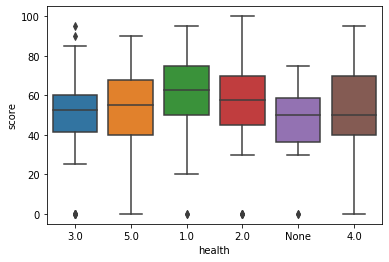

In [99]:
sns.boxplot(x = 'health', y = 'score', data = df_test)

Пропуски заменим на 5

In [100]:
df['health'] = df['health'].fillna('5')

Итого остались:
* 'address'
* 'Medu'
* 'Fedu'
* 'Mjob_health'
* 'Fjob_teacher'
* 'guardian'
* 'studytime',
* 'failures'
* 'schoolsup',
* 'higher'
* 'freetime'

In [105]:
df_new = df[['address', 'Medu', 'Fedu', 'Mjob_health', 'Fjob_teacher', 'guardian', 'studytime', 'failures', 'schoolsup', 'higher', 'freetime', 'score']]
df_new.head()

,address,Medu,Fedu,Mjob_health,Fjob_teacher,guardian,studytime,failures,schoolsup,higher,freetime,score
0,U,4.0,4.0,0.0,0.0,mother,2.0,0.0,yes,yes,3.0,30.0
1,U,1.0,1.0,0.0,0.0,father,2.0,0.0,no,yes,3.0,30.0
2,U,1.0,1.0,0.0,0.0,mother,2.0,3.0,yes,yes,3.0,50.0
3,U,4.0,2.0,1.0,0.0,mother,3.0,0.0,no,yes,2.0,75.0
4,U,3.0,3.0,0.0,0.0,father,2.0,0.0,no,yes,3.0,50.0


In [106]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 393
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       368 non-null    object 
 1   Medu          368 non-null    float64
 2   Fedu          368 non-null    float64
 3   Mjob_health   368 non-null    float64
 4   Fjob_teacher  368 non-null    float64
 5   guardian      368 non-null    object 
 6   studytime     368 non-null    float64
 7   failures      368 non-null    float64
 8   schoolsup     368 non-null    object 
 9   higher        368 non-null    object 
 10  freetime      368 non-null    float64
 11  score         368 non-null    float64
dtypes: float64(8), object(4)
memory usage: 47.4+ KB


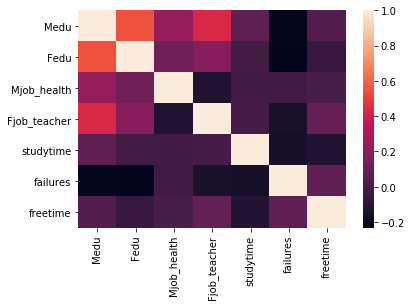

In [104]:
sns.heatmap(df_new[['Medu', 'Fedu', 'Mjob_health', 'Fjob_teacher', 'studytime', 'failures', 'freetime']].corr())

Нет сильно коррелирующих параметров

In [111]:
def get_stat_dif(data, column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [112]:
for col in ['address', 'guardian', 'schoolsup', 'higher']:
    get_stat_dif(df_new, col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher


Таким образом, для построения модели будем использовать:
* 'address'
* 'Mjob_health'
* 'Fjob_teacher'
* 'guardian'
* 'studytime',
* 'failures'
* 'schoolsup',
* 'higher'
* 'freetime'